In [1]:
import sys
sys.path.insert(-1, '/global/homes/z/zdu863/.conda/envs/py36/lib/python3.6/site-packages')

In [2]:
import os
os.chdir('/global/homes/z/zdu863/notebooks/project/run2.1/')

In [3]:
import numpy as np
import healsparse as hsp
import healpy as hp
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
import glob

In [8]:
nsideCoverage=32
nsideSparse=2048

In [11]:
def update_nobj_map(ra, dec, hsp_mp, nsideCoverage=32, nsideSparse=2048):
    pix_nums = hp.ang2pix(nsideSparse, np.radians(90-dec), np.radians(ra), nest=True) # pixels that have an object in it
    pix_uni, nobj = np.unique(pix_nums, return_counts=True) # unique indexes of picels and the number of objects in each pixel
    
    new_mp = hsp.HealSparseMap.makeEmpty(nsideCoverage, nsideSparse, dtype=np.float)
    new_mp.updateValues(pix_uni, nobj+0.) # update the value of the map in these pixels
    
    return     hsp.sumUnion([hsp_mp, new_mp])

In [27]:
hsp_map = hsp.HealSparseMap.makeEmpty(nsideCoverage, nsideSparse, dtype=np.float)
path = "/global/cscratch1/sd/zdu863/objcat_sgclass_wid/sg_tract_*.csv"
for filename in glob.glob(path):
    df=pd.read_csv(filename, index_col=0)
    if len(df)==0:
        continue
    msk_gal = (df['extendedness']==1) # select galaxy using extendedness
    msk_depth = ((df['mag_r_cModel']>17)&(df['mag_r_cModel']<24.75)) #17<r_mag<24.75
    # update number of objects map for each tract
    hsp_map = update_nobj_map(df.loc[msk_gal&msk_depth]['ra'].to_numpy(dtype=float), df.loc[msk_gal&msk_depth]['dec'].to_numpy(dtype=float), hsp_map)

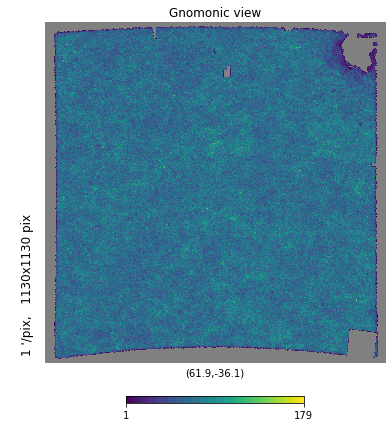

In [28]:
rec_hp = hsp_map.generateHealpixMap(nside=2048)
hp.gnomview(rec_hp, rot = [61.9,-36.1], reso=1, xsize=1130, nest=True)
plt.savefig('./maps/nobj_24.75.png', dpi=100)

In [29]:
hp.write_map("./fits/nobj_map_24_75.fits", rec_hp, overwrite=True, nest=True)

In [3]:
# rec_hp_24_5 = hp.read_map("./fits/nobj_map_24.5.fits")

In [1]:
# np.sum(rec_hp[rec_hp>0])

In [2]:
# np.sum(rec_hp_24_5[rec_hp_24_5>0])